In [1]:
from problem import mlp_problem
from environment import Environment
from problem import MLP_problem
import torch 
from stable_baselines3.common.env_checker import check_env
import stable_baselines3
from train_agent import eval_agent

MLP_problem = mlp_problem()

/home/tidianes/miniconda3/envs/tid_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(tensor([[-3.9469e-02,  7.0699e-01],
        [-2.8442e+00,  1.1923e+00],
        [-2.0516e+00,  8.2285e-01],
        [-1.7920e+00,  2.9813e-01],
        [-1.1616e-02,  1.4982e+00],
        [-7.2608e-01,  7.0113e-02],
        [-1.0080e+00,  1.0074e+00],
        [-1.0106e+00,  9.7616e-01],
        [-1.6898e+00,  8.8943e-01],
        [-2.4478e+00,  3.9666e-01],
        [ 4.7989e-01,  1.5188e+00],
        [-1.5047e+00,  7.2039e-01],
        [-1.8905e+00,  2.0764e+00],
        [ 4.0117e-01,  1.5848e+00],
        [-4.1033e-01,  8.6681e-01],
        [-7.4649e-01,  2.1512e+00],
        [ 3.0374e-01,  1.8001e+00],
        [-1.6873e+00,  2.7401e+00],
        [ 4.3559e-01,  6.9178e-01],
        [-6.6909e-01,  1.4294e+00],
        [-2.9932e-01, -8.3601e-02],
        [-7.1501e-01,  3.4824e-01],
        [-1.2149e+00,  1.2529e+00],
        [-1.7110e+00,  5.5859e-01],
        [ 2.0946e-01,  1.2366e+00],
        [-1.9519e+00,  1.1684e+00],
        [ 8.1120e-01,  4.3094e-01],
        [-1.3513e-01, -2.36

/home/tidianes/miniconda3/envs/tid_env/lib/python3.10/site-packages/stable_baselines3/common/env_checker.py:130: UserWarning: Your observation  has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(
/home/tidianes/miniconda3/envs/tid_env/lib/python3.10/site-packages/stable_baselines3/ppo/ppo.py:151: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 2
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2 and n_envs=1)
  warnings.warn(


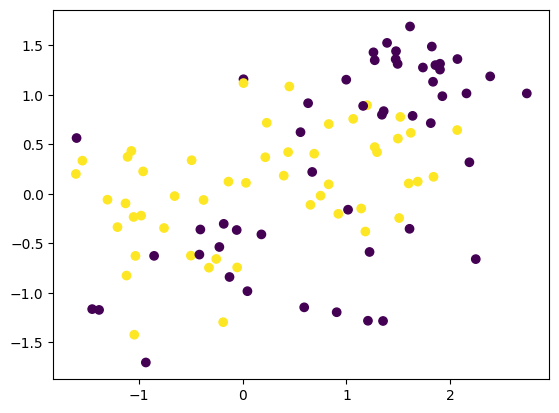

In [2]:
#plot the dataset
import matplotlib.pyplot as plt
x,y = MLP_problem["dataset"]
plt.scatter(x[:,0],x[:,1],c=y)

In [3]:
#show the model
MLP_problem["model0"]

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [4]:
#show the objective function
MLP_problem["obj_function"](MLP_problem["model0"])

tensor(0.7387, grad_fn=<AddBackward0>)

In [5]:
# define the problem list
train_problem_list = [mlp_problem() for _ in range(10)]
test_problem_list = [mlp_problem()]
# number of steps in each episode
num_steps = 100
optimizer_class_list=[torch.optim.SGD, torch.optim.Adam]

train_env = Environment(problem_list = train_problem_list,
                num_steps = num_steps, 
                history_len = 10, 
                optimizer_class_list = optimizer_class_list
                )
test_env = Environment(problem_list = test_problem_list,
                num_steps = num_steps, 
                history_len = 10, 
                optimizer_class_list = optimizer_class_list
                )

policy = stable_baselines3.PPO('MlpPolicy', train_env, n_steps=2, verbose=0,
                                            tensorboard_log='tb_logs/norm')


In [6]:

actions, rewards = eval_agent(test_env, policy, num_episodes=1, num_steps=100000)
plt.plot(rewards, label='untrained')

agent_training_timesteps = 1000
policy.learn(total_timesteps=agent_training_timesteps)


actions, rewards = eval_agent(test_env, policy, num_episodes=1, num_steps=100000)

plt.plot(rewards, label='trained')
plt.legend()

: 

: 

In [ ]:
"""

plt.plot(get_rewards([torch.optim.SGD]), label="SGD")
plt.plot(get_rewards([torch.optim.Adam]), label="Adam")
plt.plot(get_rewards([torch.optim.SGD, torch.optim.Adam]), label="SGD+Adam")
plt.plot(get_rewards([torch.optim.SGD, torch.optim.Adam], do_train=True), label="SGD+Adam trained")
plt.legend()

"""

NameError: name 'get_rewards' is not defined